In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_190921.txt'
#url2 = 'http://web.mta.info/developers/data/nyct/turnstile/turnstile_190914.txt'
df_wk = pd.read_csv(url)

In [3]:
df_wk.head()
df_wk.shape

(204928, 11)

In [4]:
#Make a column with a unique ID for each turnstile
df_wk['turnstile_id'] = df_wk['C/A']+', '+df_wk['UNIT']+', '+df_wk['SCP']+', '+df_wk['STATION']
df_wk.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,turnstile_id
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,00:00:00,REGULAR,7198818,2438323,"A002, R051, 02-00-00, 59 ST"
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,04:00:00,REGULAR,7198834,2438325,"A002, R051, 02-00-00, 59 ST"
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,08:00:00,REGULAR,7198847,2438354,"A002, R051, 02-00-00, 59 ST"
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,12:00:00,REGULAR,7198929,2438428,"A002, R051, 02-00-00, 59 ST"
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,16:00:00,REGULAR,7199125,2438483,"A002, R051, 02-00-00, 59 ST"


In [5]:
# Add datetime and date variables
df_wk['Datetime'] = pd.to_datetime(df_wk['DATE'] + ' ' + df_wk['TIME'])
df_wk['Date'] = pd.to_datetime(df_wk['DATE'])
df_wk

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,turnstile_id,Datetime,Date
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,00:00:00,REGULAR,7198818,2438323,"A002, R051, 02-00-00, 59 ST",2019-09-14 00:00:00,2019-09-14
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,04:00:00,REGULAR,7198834,2438325,"A002, R051, 02-00-00, 59 ST",2019-09-14 04:00:00,2019-09-14
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,08:00:00,REGULAR,7198847,2438354,"A002, R051, 02-00-00, 59 ST",2019-09-14 08:00:00,2019-09-14
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,12:00:00,REGULAR,7198929,2438428,"A002, R051, 02-00-00, 59 ST",2019-09-14 12:00:00,2019-09-14
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,09/14/2019,16:00:00,REGULAR,7199125,2438483,"A002, R051, 02-00-00, 59 ST",2019-09-14 16:00:00,2019-09-14
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
204923,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/20/2019,05:00:00,REGULAR,5554,420,"TRAM2, R469, 00-05-01, RIT-ROOSEVELT",2019-09-20 05:00:00,2019-09-20
204924,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/20/2019,09:00:00,REGULAR,5554,420,"TRAM2, R469, 00-05-01, RIT-ROOSEVELT",2019-09-20 09:00:00,2019-09-20
204925,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/20/2019,13:00:00,REGULAR,5554,420,"TRAM2, R469, 00-05-01, RIT-ROOSEVELT",2019-09-20 13:00:00,2019-09-20
204926,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,09/20/2019,17:00:00,REGULAR,5554,420,"TRAM2, R469, 00-05-01, RIT-ROOSEVELT",2019-09-20 17:00:00,2019-09-20


In [6]:
# Get minimum reading for each turnstile per day
df_wk_min = df_wk.groupby(['turnstile_id', 'Date'])['ENTRIES'].min().reset_index() #making df with both indexes
df_wk_min.head()

,turnstile_id,Date,ENTRIES
0,"A002, R051, 02-00-00, 59 ST",2019-09-14,7198818
1,"A002, R051, 02-00-00, 59 ST",2019-09-15,7199547
2,"A002, R051, 02-00-00, 59 ST",2019-09-16,7200082
3,"A002, R051, 02-00-00, 59 ST",2019-09-17,7201361
4,"A002, R051, 02-00-00, 59 ST",2019-09-18,7202723


In [7]:
df_wk_min.shape

(34174, 3)

In [8]:
# Calculating entries per day by subtracting min entries for given day from the next day. 
# Last day values are not calculated due to "the lack of the next day".
df_wk_min['entries_daily'] = df_wk_min.groupby(['turnstile_id'])['ENTRIES'].diff()

In [9]:
df_wk_min.head()

,turnstile_id,Date,ENTRIES,entries_daily
0,"A002, R051, 02-00-00, 59 ST",2019-09-14,7198818,NaN
1,"A002, R051, 02-00-00, 59 ST",2019-09-15,7199547,729.0
2,"A002, R051, 02-00-00, 59 ST",2019-09-16,7200082,535.0
3,"A002, R051, 02-00-00, 59 ST",2019-09-17,7201361,1279.0
4,"A002, R051, 02-00-00, 59 ST",2019-09-18,7202723,1362.0


In [10]:
# Fixing the `entries_daily`. Shifting up one row
df_wk_min['entries_daily'] = df_wk_min['entries_daily'].shift(-1)

In [11]:
df_wk_min.head()

,turnstile_id,Date,ENTRIES,entries_daily
0,"A002, R051, 02-00-00, 59 ST",2019-09-14,7198818,729.0
1,"A002, R051, 02-00-00, 59 ST",2019-09-15,7199547,535.0
2,"A002, R051, 02-00-00, 59 ST",2019-09-16,7200082,1279.0
3,"A002, R051, 02-00-00, 59 ST",2019-09-17,7201361,1362.0
4,"A002, R051, 02-00-00, 59 ST",2019-09-18,7202723,1433.0


In [ ]:


# Calculating daily entry values for "the last day" by subtracting daily minimum value fror the maximum value 
df_wk_min['entries_daily'] = 
df_wk_min = df_wk.groupby(['turnstile_id', 'Date'])['ENTRIES'].min().reset_index()

In [21]:
# Add station column back
df_wk_daily = df_wk_min.merge(df_wk[['turnstile_id', 'STATION']], on='turnstile_id')
df_wk_daily.sample(10)

,turnstile_id,Date,ENTRIES,entries_daily,STATION
1192049,"R301, R323, 00-06-01, CENTRAL PK N110",2019-09-19,51996187,895.0,CENTRAL PK N110
241851,"H027, R137, 01-06-02, MYRTLE-WYCKOFF",2019-09-14,4749821,6.0,MYRTLE-WYCKOFF
1288086,"R512, R092, 00-03-02, BROADWAY",2019-09-17,686100,4312.0,BROADWAY
412513,"N091, R029, 02-05-03, CHAMBERS ST",2019-09-19,68933710,2747.0,CHAMBERS ST
571331,"N319, R298, 01-00-00, NORTHERN BLVD",2019-09-18,2612103,789.0,NORTHERN BLVD
1162890,"R258, R132, 00-03-00, 125 ST",2019-09-14,69075337,957.0,125 ST
867462,"PTH18, R549, 01-02-04, NEWARK BM BW",2019-09-16,38222,995.0,NEWARK BM BW
466746,"N126, R441, 00-00-00, VAN SICLEN AVE",2019-09-15,6615469,613.0,VAN SICLEN AVE
315112,"N016A, R296, 00-00-03, 163 ST-AMSTERDM",2019-09-18,165358,572.0,163 ST-AMSTERDM
338129,"N043, R186, 00-06-00, 86 ST",2019-09-14,294411,441.0,86 ST


In [27]:
# Daily entries by stations
staion_daily = df_wk_daily.groupby(['STATION', 'Date'])['entries_daily'].sum().reset_index()

,STATION,Date,entries_daily
0,1 AV,2019-09-14,840.0
1,1 AV,2019-09-15,1302.0
2,1 AV,2019-09-16,732732.0
3,1 AV,2019-09-17,790860.0
4,1 AV,2019-09-18,786030.0
...,...,...,...
2641,ZEREGA AV,2019-09-16,116481.0
2642,ZEREGA AV,2019-09-17,125419.0
2643,ZEREGA AV,2019-09-18,126116.0
2644,ZEREGA AV,2019-09-19,125419.0


In [34]:
# Sum of entries by stations for a week (6 days due to solutuon limitation)
station_weekly = df_wk_daily.groupby(['STATION'])['entries_daily'].sum().reset_index()

In [35]:
station_weekly

,STATION,entries_daily
0,1 AV,3116778.0
1,103 ST,6879978.0
2,103 ST-CORONA,4719414.0
3,104 ST,652638.0
4,110 ST,2405340.0
...,...,...
373,WOODLAWN,1629615.0
374,WORLD TRADE CTR,3971856.0
375,WTC-CORTLANDT,2901990.0
376,YORK ST,3204306.0


# Graphs

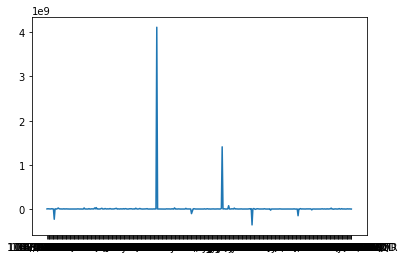

In [39]:
plt.plot(station_weekly['STATION'], station_weekly['entries_daily'])

# Data cleaning migh be needed!

In [25]:
# Negative daily values
df_wk_min[df_wk_min.entries_daily<0]

,turnstile_id,Date,ENTRIES,entries_daily
267,"A011, R080, 01-03-00, 57 ST-7 AV",2019-09-14,885813143,-401.0
268,"A011, R080, 01-03-00, 57 ST-7 AV",2019-09-15,885812742,-296.0
269,"A011, R080, 01-03-00, 57 ST-7 AV",2019-09-16,885812446,-217.0
270,"A011, R080, 01-03-00, 57 ST-7 AV",2019-09-17,885812229,-299.0
271,"A011, R080, 01-03-00, 57 ST-7 AV",2019-09-18,885811930,-317.0
...,...,...,...,...
33868,"R730, R431, 00-00-04, EASTCHSTER/DYRE",2019-09-16,1559932613,-615.0
33869,"R730, R431, 00-00-04, EASTCHSTER/DYRE",2019-09-17,1559931998,-622.0
33870,"R730, R431, 00-00-04, EASTCHSTER/DYRE",2019-09-18,1559931376,-626.0
33871,"R730, R431, 00-00-04, EASTCHSTER/DYRE",2019-09-19,1559930750,-543.0


In [ ]:
# Zero daily values
df_wk_min[df_wk_min.entries_daily==0]